# Solution
First approach is to use the shapely Polygon functionality and then looking to see if points are inside of the polygon.

Second approach is to use Pick's theorem

In [1]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from tqdm.notebook import tqdm

In [2]:
data = open("input/18").read().splitlines()

In [3]:
instructions = []
for line in data:
    direction1, steps, color = line.split(" ")
    direction2 = color[7]
    hex_steps = int(color[2:7], base=16)

    instructions.append([direction1, int(steps), direction2, hex_steps])

In [4]:
grid1 = []
pos1 = (0, 0)
grid1.append(pos1)

grid2 = []
pos2 = (0, 0)
grid2.append(pos2)

In [5]:
num_points1, num_points2 = 0, 0
for direction1, steps1, direction2, steps2 in instructions:
    if direction1 == "R":
        pos1 = (pos1[0], pos1[1] + steps1)
    elif direction1 == "L":
        pos1 = (pos1[0], pos1[1] - steps1)
    elif direction1 == "U":
        pos1 = (pos1[0] - steps1, pos1[1])
    elif direction1 == "D":
        pos1 = (pos1[0] + steps1, pos1[1])
    grid1.append(pos1)
    num_points1 += steps1
    
    if direction2 == "0":
        pos2 = (pos2[0], pos2[1] + steps2)
    elif direction2 == "2":
        pos2 = (pos2[0], pos2[1] - steps2)
    elif direction2 == "3":
        pos2 = (pos2[0] - steps2, pos2[1])
    elif direction2 == "1":
        pos2 = (pos2[0] + steps2, pos2[1])
    grid2.append(pos2)
    num_points2 += steps2

# Check all points to see if they are inside the polygon

In [6]:
maxx, maxy, minx, miny = 0, 0, 0, 0
for key in grid1:
    x, y = key
    maxx = max(maxx, x)
    maxy = max(maxy, y)
    
    minx = min(minx, x)
    miny = min(miny, y)

In [7]:
polygon1 = Polygon(grid1)

In [8]:
brute_force_pt1 = num_points1
for x in tqdm(range(minx - 1, maxx + 1)):
    for y in range(miny - 1, maxy + 1):
        in_polygon = polygon1.contains(Point((x, y)))
        if in_polygon:
            brute_force_pt1 += 1

  0%|          | 0/256 [00:00<?, ?it/s]

In [9]:
brute_force_pt1

28911

# Using Pick's theorem

In [10]:
def get_num_points(area, perimeter_len):
    return int(area - (perimeter_len / 2) + 1)

def num_points(polygon, num_points):
    return get_num_points(polygon.area, num_points) + num_points


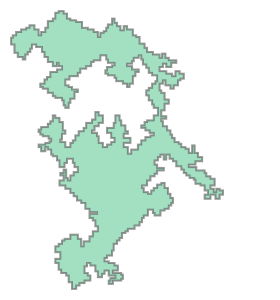

In [11]:
polygon1

In [12]:
print("Answer #1:", num_points(polygon1, num_points1))

Answer #1: 28911


In [13]:
polygon2 = Polygon(grid2)

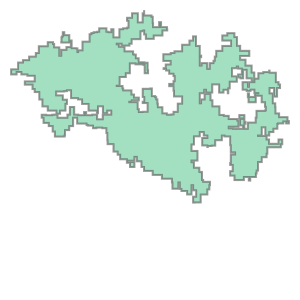

In [14]:
polygon2

In [15]:
print("Answer #2:", num_points(polygon2, num_points2))

Answer #2: 77366737561114
